### The objective of this task is to predict keypoint positions on face images. 
For example keypoint position means left eye corner, left eye center etc.

Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face: 
left_eye_center,
right_eye_center, 
left_eye_inner_corner, 
left_eye_outer_corner, 
right_eye_inner_corner, 
right_eye_outer_corner, 
left_eyebrow_inner_end, 
left_eyebrow_outer_end, 
right_eyebrow_inner_end, 
right_eyebrow_outer_end, 
nose_tip, mouth_left_corner,
mouth_right_corner, 
mouth_center_top_lip, 
mouth_center_bottom_lip

Data and more information  on this project can be found on:
https://www.kaggle.com/c/facial-keypoints-detection

In this jupyter notebook, keras with TensorFlow backend is used as Deep learning platform

#### NOTE : The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

### Importing modules/libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D 

C:\Users\Rahul\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loading dataset and initial Exploratory Data Analysis

In [13]:
path = "C:\\Learn\\Meetup_Face_detection\\all\\training\\training.csv"
dataset = pd.read_csv(path)
print('Dimensions of dataset : {}'.format(dataset.shape))
print('Column names in the dataset :', dataset.columns)
dataset.head(2)

Dimensions of dataset : (7049, 31)
Column names in the dataset : Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

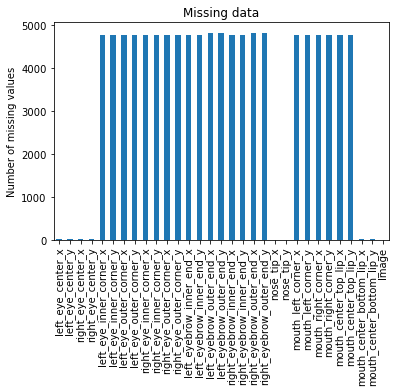

In [15]:
# Checking missing data
print(pd.isnull(dataset).sum())
pd.isnull(dataset).sum().plot('bar')
plt.title('Missing data')
plt.ylabel('Number of missing values')
plt.show()

###### Massaging the data to bring it in proper shape i.e. creating matrices of image pixels to be used as input to NN. Also separating input data (predictors) and outcome (dependendent) data

Each image is 96 * 96 = 9216 pixels

In [19]:
# Making a copy of data to apply transformation
train = dataset.copy()

# Converting the image column which is in string format to numpy array
train.Image = train.Image.apply(lambda x : np.fromstring(x,int,sep=' '))

#Checking the length of first image array i.e. Image[0]
print('Length of an image array: ',len(train.Image[0]))

train.head(1)

Length of an image array:  9216


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[238, 236, 237, 238, 240, 240, 239, 241, 241, ..."


#### Removing missing data

In [20]:
train.dropna(inplace=True)
print('Dimension of dataset after removing missing data :',train.shape)

# Reseting the index after missing data removal 
train.reset_index(drop=True,inplace=True)

train.head(1)

Dimension of dataset after removing missing data : (2140, 31)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[238, 236, 237, 238, 240, 240, 239, 241, 241, ..."


#### Separating Dependent columns (i.e. Y) from the dataset

In [21]:
train_Y = train.drop('Image',axis=1)
print('Dimension of Y :', train_Y.shape)
train_Y.head(2)

Dimension of Y : (2140, 30)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170


#### Convering the image data into proper shape (Numbe_ of_images, pixel, pixel, number_of_channels)

In [22]:
train_X = train.Image
x= []
for i in range(train.Image.shape[0]):
    x.append(train_X[i])
X_train = np.array(x).reshape(train.Image.shape[0],96,96,1)
X_train.shape

(2140, 96, 96, 1)

#### Plotting random images

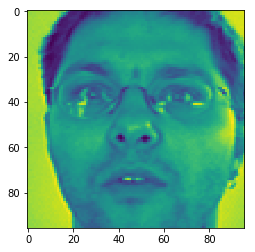

In [29]:
index=201
plt.imshow((X_train[index]).reshape(96,96))
plt.show()

#### Defining the Convolution Neural Network design
    Used Convolution layers, Dropout layers, Max Pooling layers, Dense layer. 
    Since it is a regression problem with 30 outputs (15 (x,y) co-ordinates), final layer does not need any activation function

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),activation='relu',input_shape= (96, 96, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30))

#### Used Adam optimizer for backward propagation and MSE as loss function

In [24]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

     This is how the final design of CNN looks 

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 92, 92, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1548850   
__________

#### Fitting the model

In [427]:
model.fit(x=X_train,y=train_Y,epochs=30,batch_size=250,verbose=2)

Epoch 1/30
 - 51s - loss: 1841.6723 - mean_squared_error: 1841.6723
Epoch 2/30
 - 55s - loss: 1740.2291 - mean_squared_error: 1740.2291
Epoch 3/30
 - 54s - loss: 1636.2247 - mean_squared_error: 1636.2247
Epoch 4/30
 - 53s - loss: 1548.4969 - mean_squared_error: 1548.4969
Epoch 5/30
 - 52s - loss: 1453.8692 - mean_squared_error: 1453.8692
Epoch 6/30
 - 55s - loss: 1326.9019 - mean_squared_error: 1326.9019
Epoch 7/30
 - 52s - loss: 1267.4278 - mean_squared_error: 1267.4278
Epoch 8/30
 - 52s - loss: 1183.7430 - mean_squared_error: 1183.7430
Epoch 9/30
 - 52s - loss: 1137.2353 - mean_squared_error: 1137.2353
Epoch 10/30
 - 57s - loss: 1091.5327 - mean_squared_error: 1091.5327
Epoch 11/30
 - 51s - loss: 1067.8901 - mean_squared_error: 1067.8901
Epoch 12/30
 - 49s - loss: 1005.7207 - mean_squared_error: 1005.7207
Epoch 13/30
 - 48s - loss: 966.3391 - mean_squared_error: 966.3391
Epoch 14/30
 - 48s - loss: 930.7839 - mean_squared_error: 930.7839
Epoch 15/30
 - 49s - loss: 923.1550 - mean_squa